Prerequisites
--------
------------


Registration number: 191910

Alpha = 1 + mod(910,4)

Alpha = 3

In [25]:
# Import Statements
import numpy as np
import pandas as pd
import scipy as sc
import math
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal as sg
from IPython.display import Audio, display, Latex

In [6]:
# Alpha  = 1 + mod(910,4)
alpha = 1 + (910%4)
display(Latex(r'\alpha : ' + str(alpha)))

<IPython.core.display.Latex object>

In [7]:
# This is because I'm using Google Colab Noteboook 
# So please don't run this without mounting the drive
from google.colab import drive
drive.mount("/content/drive")
%cd drive/My\ Drive/DSP\ LAB/Experiment\ 5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/DSP LAB/Experiment 5'
/content/drive/My Drive/DSP LAB/Experiment 5


Problem  #1
-----
-----

Question 1
---------------

Text(0, 0.5, 'x(t) = $sin(2\\pi F(t)t)$')

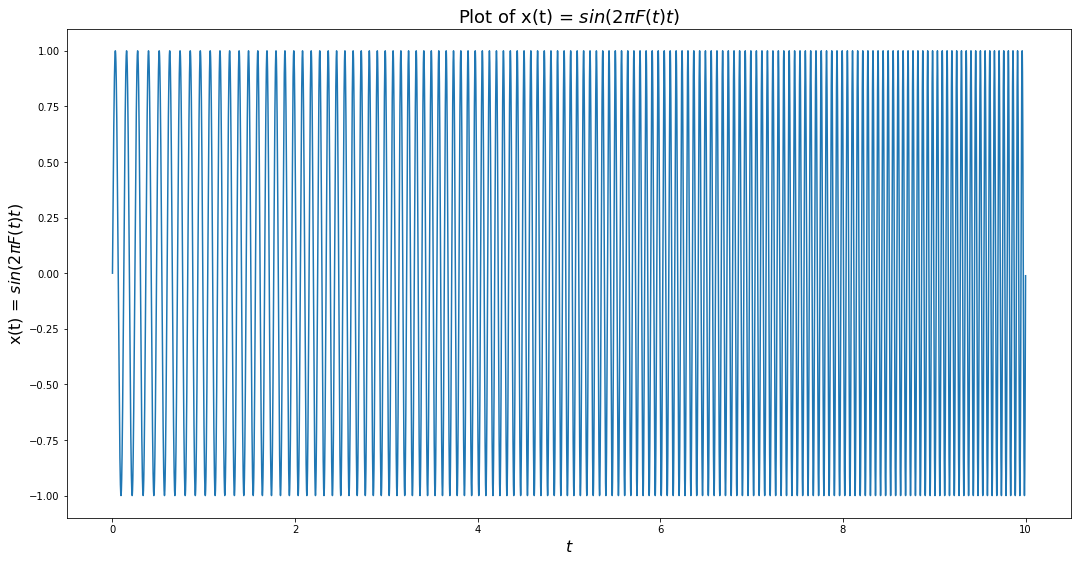

In [97]:
freqs = 100
t = np.arange(0, 10, 1/fs)
F_t = 2*(1 + alpha) + 3*(1 + alpha)*t
signal = sg.chirp(t, 2*(1 + alpha), 10, 5*(1 + alpha), method='linear',phi=-90)
plt.figure(figsize=(18, 9))
plt.tight_layout(pad=4)
plt.plot(t,signal)
plt.title('Plot of x(t) = $sin(2\pi F(t)t)$',fontsize = 18)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('x(t) = $sin(2\pi F(t)t)$', fontsize=16)

Question 2
------------------

(0.0, 5512.5)

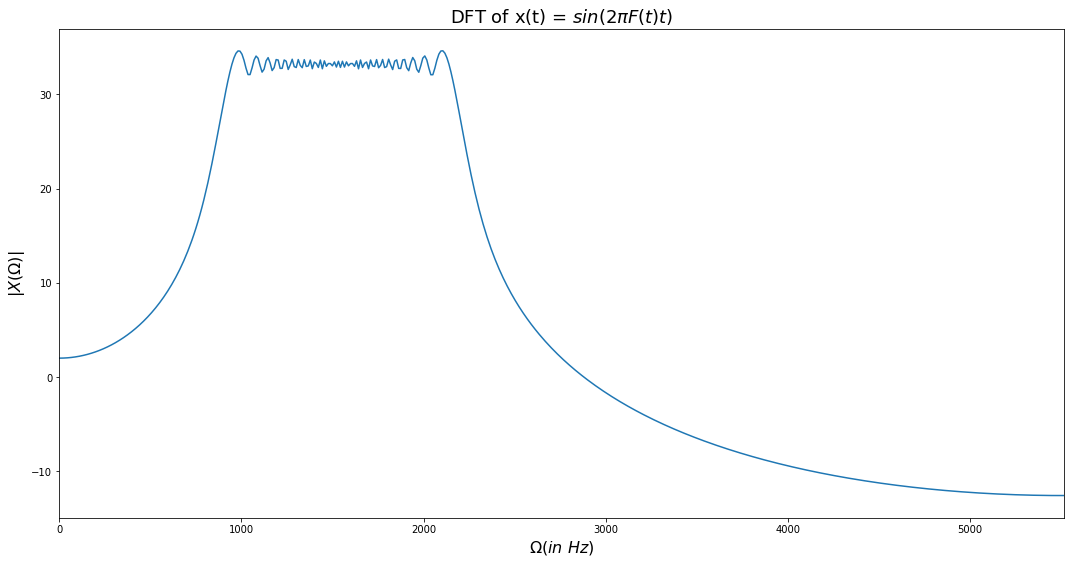

In [98]:
dft = np.abs(np.fft.fft(p_1_signal))
freq = np.arange(len(dft))/(len(dft)/fs)
plt.figure(figsize=(18,9))
plt.plot(freq, 20*np.log10(dft))
plt.title('DFT of x(t) = $sin(2\pi F(t)t)$', fontsize=18)
plt.xlabel('$\Omega(in\ Hz)$', fontsize=16)
plt.ylabel(r'$|X(\Omega)|$', fontsize=16)
plt.xlim(0, fs/2)

Question 3
-----------------

In [99]:
def plot_spectrogram(signal, sample_s, overlap, window=None, length=None):
  plt.figure(figsize=(18,9))
  spec, freqs, t, im = plt.specgram(signal, NFFT=length,
                                   window=sg.get_window(window, length),
                                   noverlap=overlap,Fs=sample_s,
                                   scale='dB',vmax=0)
  plt.title(r'$Spectrogram\ of\ Chirp\ Signal\ (x(t)\  =\ sin(2\pi F(t)t)) \ with\ %s\  window\ length\ : %d$'
            %(window, length), fontsize = 18)
  plt.ylabel('Freq [Hz]', fontsize=16)
  plt.xlabel('t', fontsize=16)
  ax = plt.axes()
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 12)
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


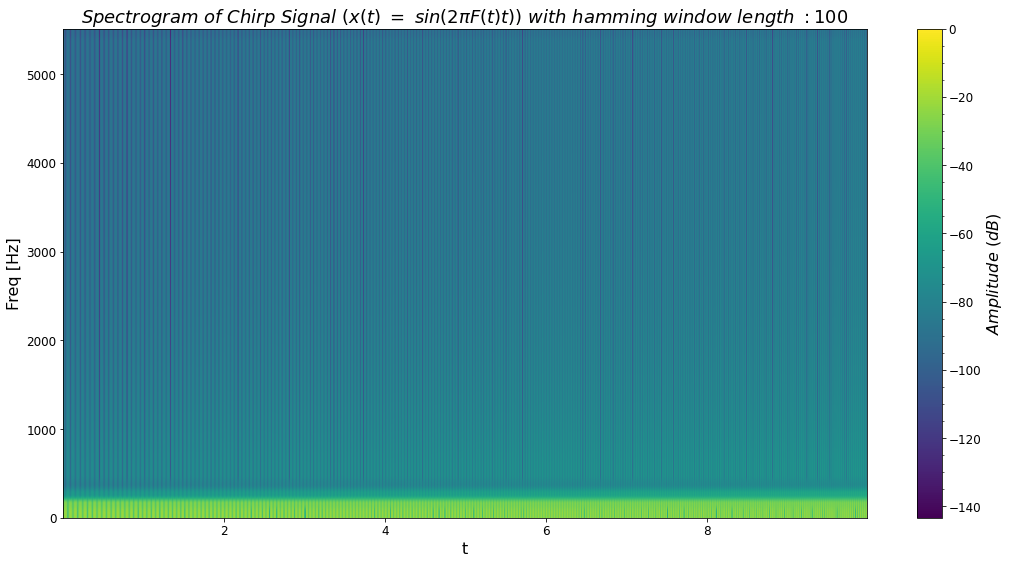

In [100]:
plot_spectrogram(signal, fs, overlap=10, window='hamming', length=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


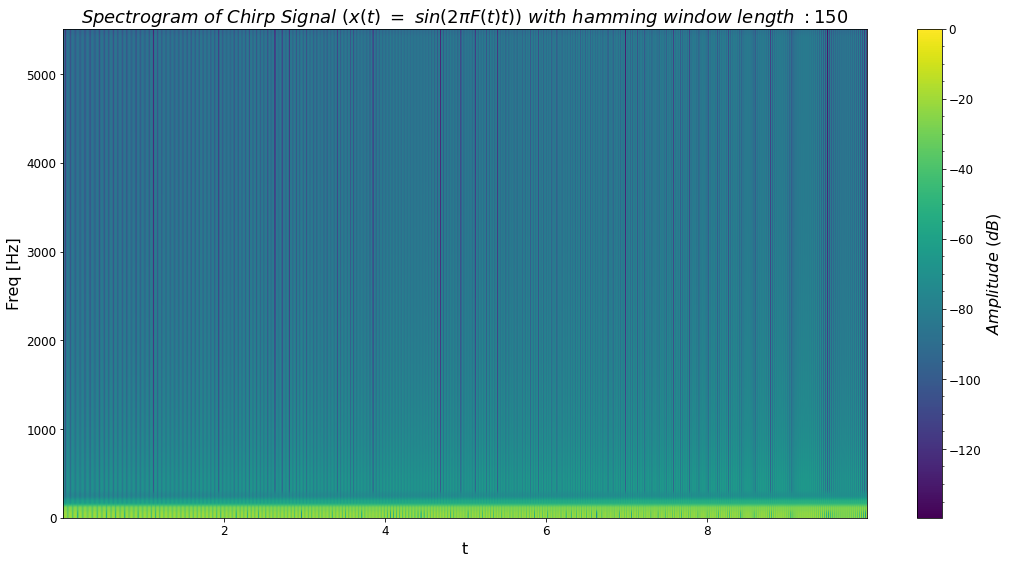

In [101]:
plot_spectrogram(signal, fs, overlap=10, window='hamming', length=150)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


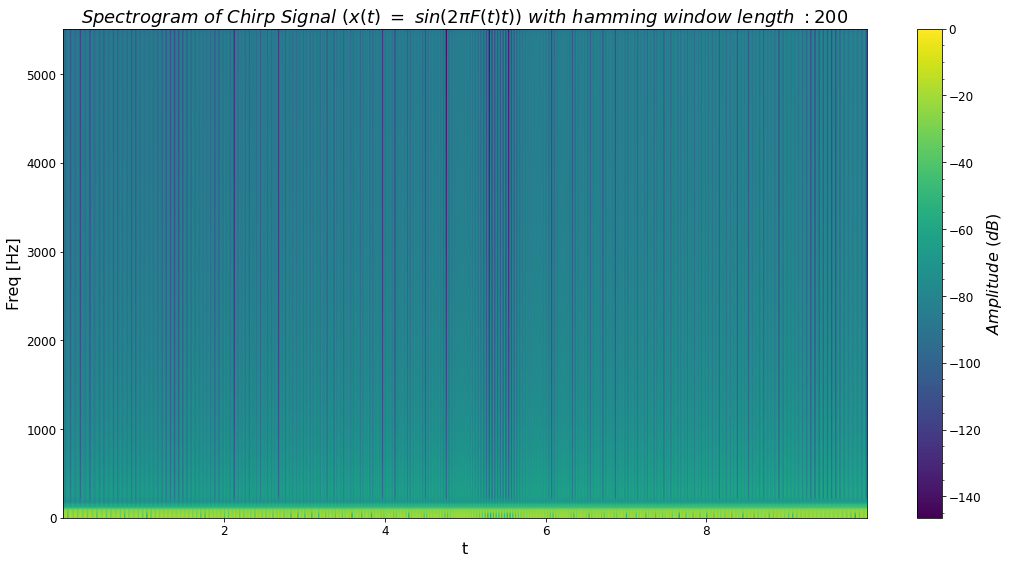

In [102]:
plot_spectrogram(signal, fs, overlap=10, window='hamming', length=200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


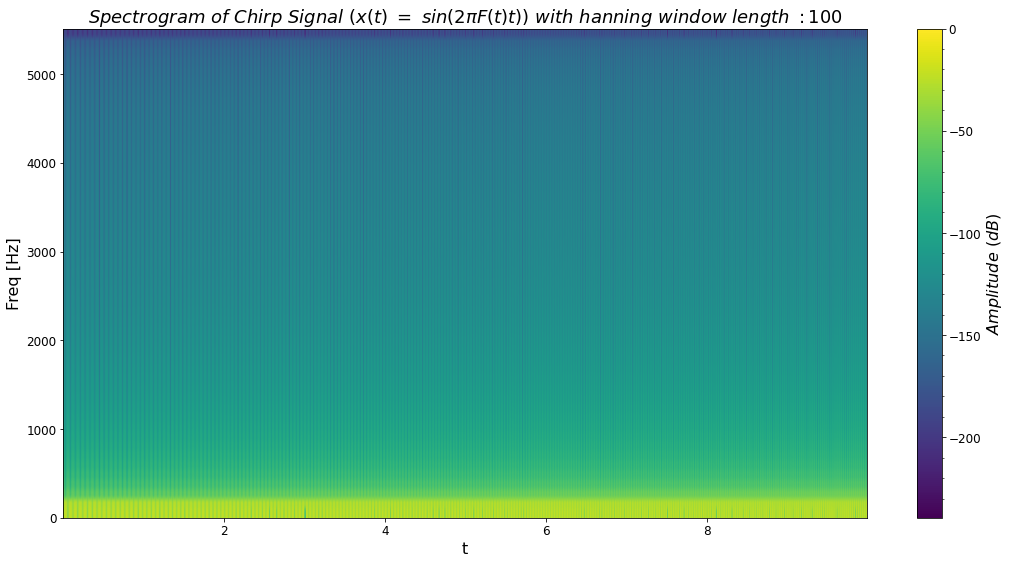

In [103]:
plot_spectrogram(signal, fs, overlap=10, window='hanning', length=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


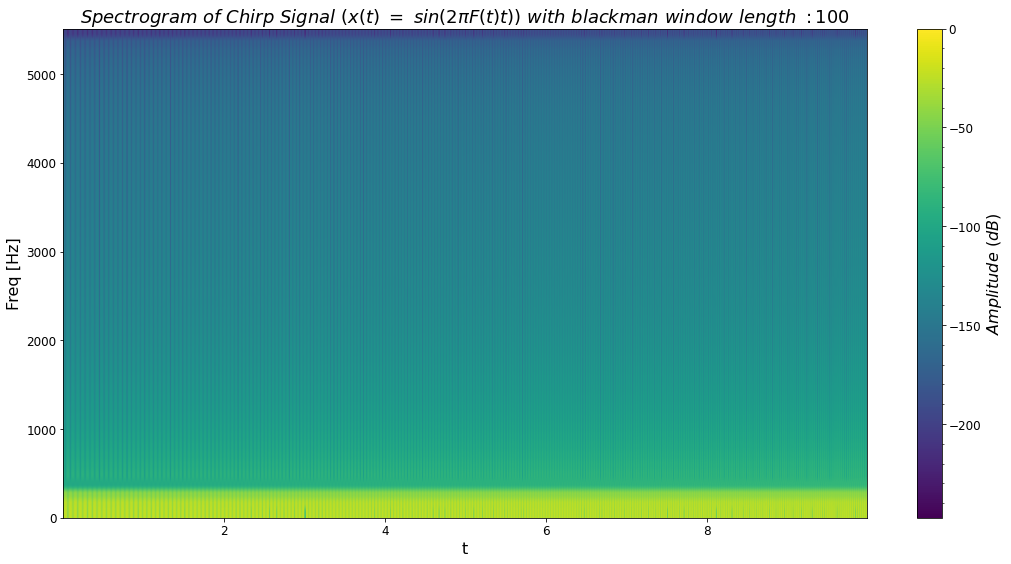

In [104]:
plot_spectrogram(signal, fs, overlap=10, window='blackman', length=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


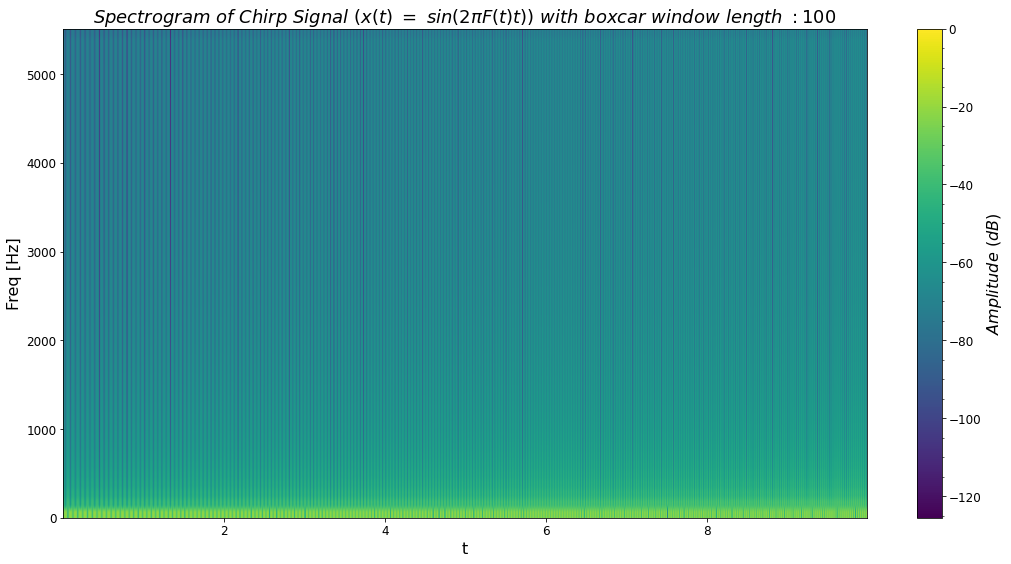

In [105]:
plot_spectrogram(signal, fs, overlap=10, window='boxcar', length=100)

--------------

Problem  #2
-----
-----

Question 1
==========

In [106]:
def plot_spectrogram(signal, sample_s, overlap, window=None, length=None):
  plt.figure(figsize=(18,9))
  spec, freqs, t, im = plt.specgram(signal, NFFT=length,
                                   window=sg.get_window(window, length),
                                   noverlap=overlap,Fs=sample_s,
                                   scale='dB',vmax=0)
  plt.title(r'$Spectrogram\ of\ instru3.wav\ Signal \ with\ %s\  window\ length\ : %d$'
            %(window, length), fontsize = 18)
  plt.ylabel('Freq [Hz]', fontsize=16)
  plt.xlabel('t', fontsize=16)
  ax = plt.axes()
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 12)
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


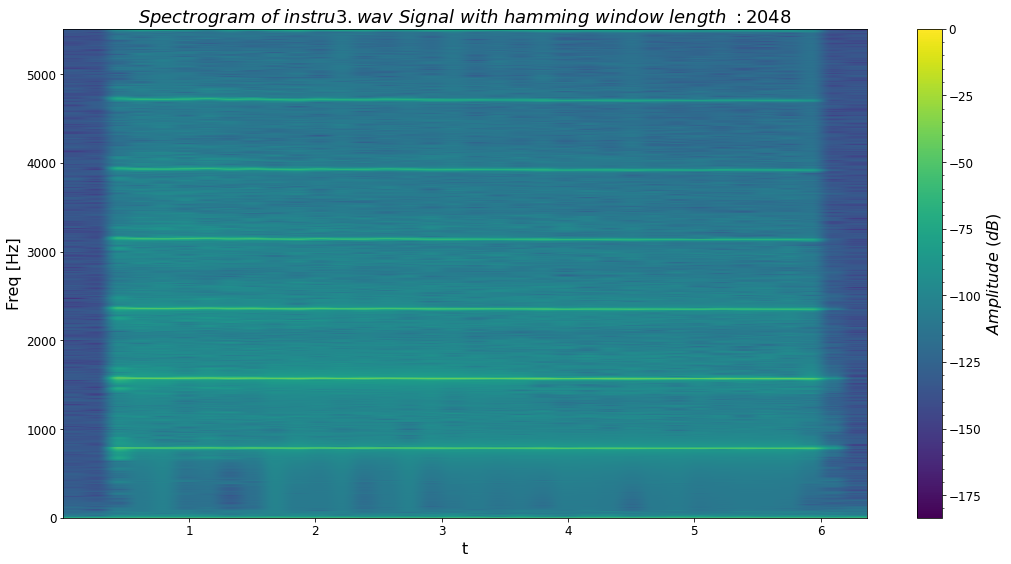

In [107]:
fs, signal = wavfile.read('instru%d.wav' %(alpha))
plot_spectrogram(signal/32767.0, fs, overlap=100, window='hamming',length=2048)

(0.0, 5512.5)

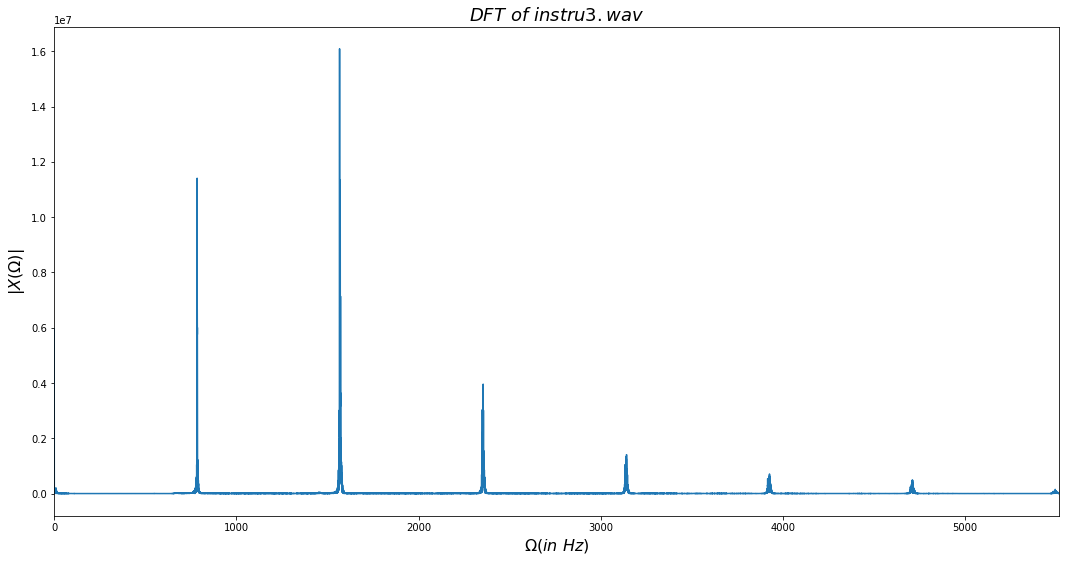

In [108]:
dft = np.abs(np.fft.fft(signal))
freq = np.arange(len(dft))/(len(dft)/fs)
plt.figure(figsize=(18,9))
plt.plot(freq, dft)
plt.title(r'$DFT\ of\ instru3.wav$', fontsize=18)
plt.xlabel('$\Omega(in\ Hz)$', fontsize=16)
plt.ylabel(r'$|X(\Omega)|$', fontsize=16)
plt.xlim(0, fs/2)

<IPython.core.display.Latex object>

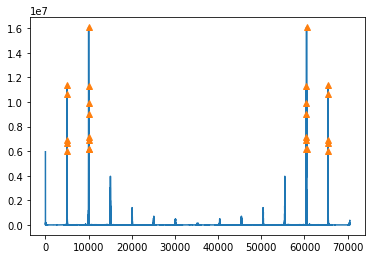

In [109]:
peaks, _ = sg.find_peaks(dft, height=5000000)
f0 = (peaks[0]/len(dft))*p_2_f_s
plt.plot(dft)
plt.plot(peaks, dft[peaks], "^")
Latex(data=r'$Fundamental\ Frequency = %f$' %(f0))

Question 2
========

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


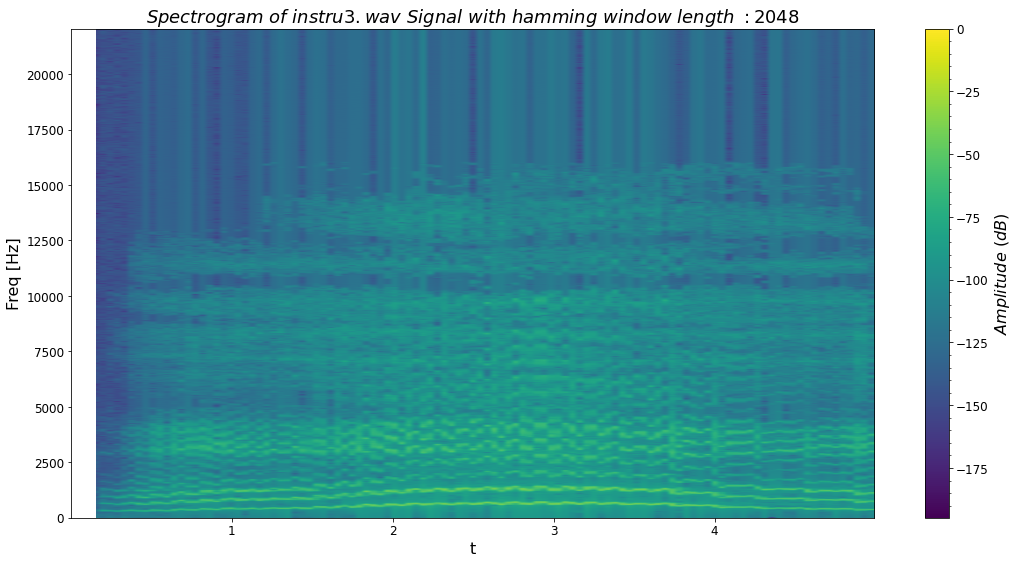

In [110]:
p_2_f_s_1, p_2_signal_1 = wavfile.read('Opera.wav')
plot_spectrogram(p_2_signal_1/32767.0, p_2_f_s_1, overlap=100, window='hamming',length=2048)

-----------------------

Problem  #3
-----
-----

In [111]:
def plot_spectrogram(signal, sample_s, overlap, window=None, length=None):
  plt.figure(figsize=(18,9))
  spec, freqs, t, im = plt.specgram(signal, NFFT=length,
                                   window=sg.get_window(window, length),
                                   noverlap=overlap,Fs=sample_s,
                                   scale='dB',vmax=0)
  plt.title(r'$Spectrogram\ of\ My\ Name \ Recording \ Audio\ Signal \ with\ %s\  window\ length\ : %d$'
            %(window, length), fontsize = 18)
  plt.ylabel('Freq [Hz]', fontsize=16)
  plt.xlabel('t', fontsize=16)
  ax = plt.axes()
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 12)
  plt.show()

Text(0, 0.5, 'Amplitude')

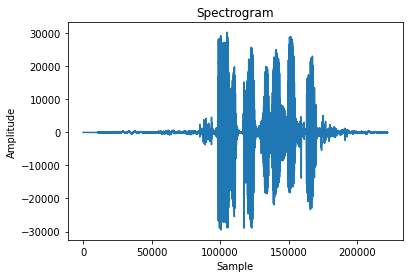

In [112]:
# Read the wav file (mono)
samplingFrequency, signalData = wavfile.read('Name.wav')
# Plot the signal read from wav file
plot.title('Spectrogram') 
plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


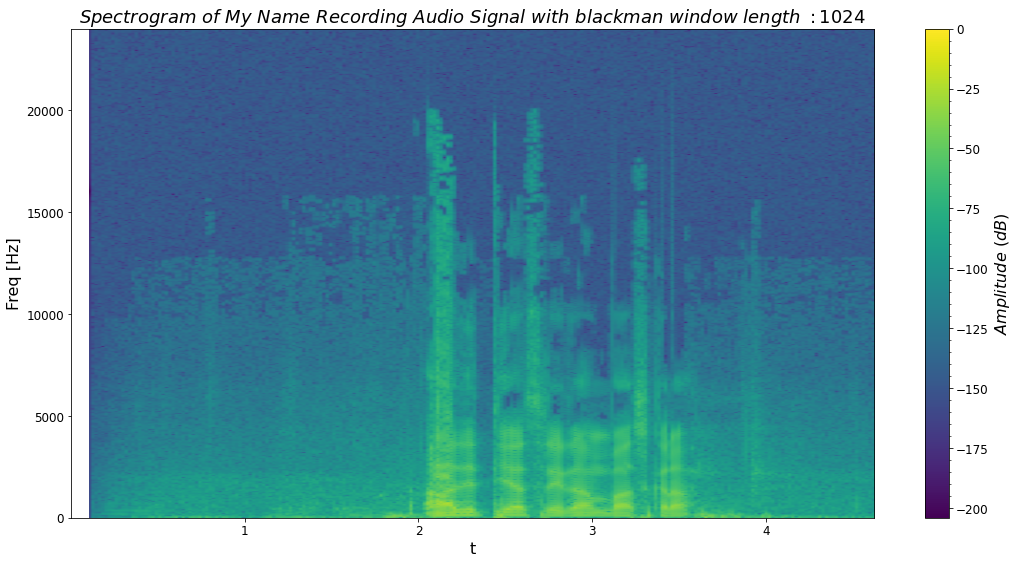

In [113]:
plot_spectrogram(signalData/32767.0, samplingFrequency, overlap=100, window='blackman',length=1024)